In [1]:
import numpy as np

# Figure 2AC - Raw activity plots

In [14]:
import json

N_PFC_NEURONS = 500

data_dir = "/om2/group/halassa/PFCMD-ali-sabrina/020321_qvals/by_trial"
s_trial = 0
t_trial = 1600

# each neuron's activity is a row; column index is trial number
n_trials = t_trial - s_trial + 1
rPFC_trials = np.zeros((n_trials, 200, N_PFC_NEURONS))
output_choice = np.zeros(n_trials)
task_input = np.zeros((2, n_trials))
q_values = np.zeros((2, n_trials))

for i in range(s_trial, t_trial+1):
    with open(data_dir + "/" + str(i) + ".json") as json_file:
        data = json.load(json_file)
        idx = i - s_trial
        
        # NOTE: We are only considering the cue period for analysis
        rPFC = np.array(data["network_rates"]["r_PFC"])
        rPFC_trials[idx,:,:] = rPFC
        
        rOutput = np.array(data["network_rates"]["r_output"])
        trial_output_choice = np.mean(rOutput, axis=0).argmax(0)
        output_choice[idx] = trial_output_choice
        
        trial_task_input = np.array(data["trial_data"]["input"])
        task_input[:,idx] = trial_task_input[:2]
        q_values[:,idx] = trial_task_input[2:]


In [59]:
import statsmodels.api as sm

CUE_TIME = 100
neuron_idx = 15

avg_rPFC = np.mean(rPFC_trials[:,math.floor(CUE_TIME/2):CUE_TIME,neuron_idx],1)

cue = task_input[0,:]
cue[cue == 0] = -1

choice = output_choice
choice[choice == 0] = -1

strategy = task_input[0,:] == output_choice
strategy = [1 if is_match else -1 for is_match in trial_type]

v1 = q_values[0,:]

X = sm.add_constant(np.transpose([v1, cue, choice, strategy]))
y = avg_rPFC

model = sm.OLS(y,X)
results = model.fit()

params = results.params
rsquared = results.rsquared
pvalues = results.pvalues

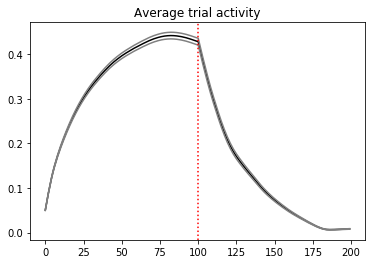

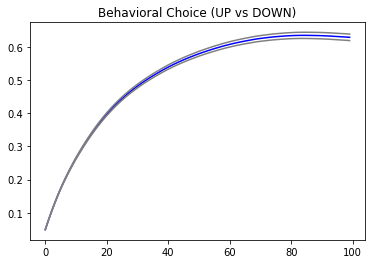

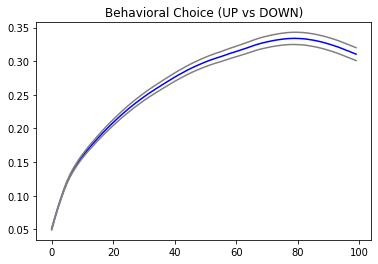

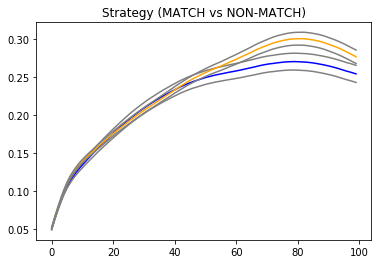

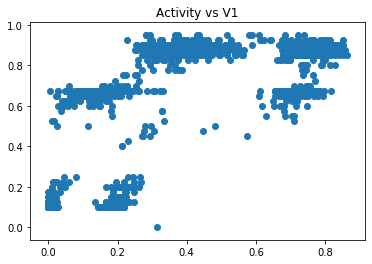

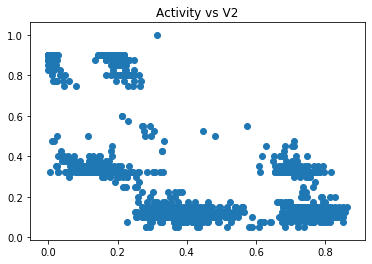

Text(3, 0.03, '9.65e-06')

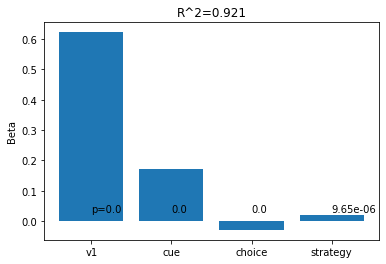

In [63]:
from scipy import stats
import math
import matplotlib.pyplot as plt

def plot_stderr(x, c):
    m = np.mean(x, 0)
    stderr = stats.sem(x, 0)
    plt.plot(m, c)
    plt.plot(m + stderr, 'grey')
    plt.plot(m - stderr, 'grey')

# Plot over all trials
neuron_activity = rPFC_trials[:,:,neuron_idx]
plot_stderr(neuron_activity, 'k')
plt.axvline(CUE_TIME, color='r', linestyle=':')
plt.title("Average trial activity")
plt.show()

# Plot cue UP trials vs cue DOWN trials
cue_is_up = task_input[0,:] == 1
cue_is_down = task_input[0,:] == 0
cue_up_activity = rPFC_trials[cue_is_up,:CUE_TIME,neuron_idx]
cue_down_activity = rPFC_trials[cue_is_down,:CUE_TIME,neuron_idx]
plot_stderr(cue_up_activity, 'blue')
plot_stderr(cue_down_activity, 'orange')
plt.title("Behavioral Choice (UP vs DOWN)")
plt.show()

# Plot choice UP trials vs choice DOWN trials
choice_is_up = [c == 1 for c in output_choice]
choice_is_down = [c == 0 for c in output_choice]
choice_up_activity = rPFC_trials[choice_is_up,:CUE_TIME,neuron_idx]
choice_down_activity = rPFC_trials[choice_is_down,:CUE_TIME,neuron_idx]
plot_stderr(choice_up_activity, 'blue')
plot_stderr(choice_down_activity, 'orange')
plt.title("Behavioral Choice (UP vs DOWN)")
plt.show()

# Plot choice MATCH trials vs chocie NON-MATCH trials
choice_is_match = task_input[0,:] == output_choice
choice_match_activity = rPFC_trials[choice_is_match,:CUE_TIME,neuron_idx]
choice_is_nmatch = task_input[1,:] == output_choice
choice_nmatch_activity = rPFC_trials[choice_is_nmatch,:CUE_TIME,neuron_idx]
plot_stderr(choice_match_activity, 'blue')
plot_stderr(choice_nmatch_activity, 'orange')
plt.title("Strategy (MATCH vs NON-MATCH)")
plt.show()

# Plot V1 (and V2) vs average activity in 2nd half of choice 
m_activity_late_cue = np.mean(rPFC_trials[:,math.floor(CUE_TIME/2):CUE_TIME,neuron_idx],1)
plt.scatter(m_activity_late_cue, q_values[0,:])
plt.title("Activity vs V1")
plt.show()
plt.scatter(m_activity_late_cue, q_values[1,:])
plt.title("Activity vs V2")
plt.show()

# Plot regression bar plot
plt.bar(["v1", "cue", "choice", "strategy"], params)
plt.ylabel("Beta")
plt.title(f"R^2={np.around(rsquared,3)}")
plt.text(0, 0.03, f"p={np.around(pvalues[0],8)}")
plt.text(1, 0.03, f"{np.around(pvalues[1],8)}")
plt.text(2, 0.03, f"{np.around(pvalues[2],8)}")
plt.text(3, 0.03, f"{np.around(pvalues[3],8)}")


# Regression analysis

In [ ]:
import json

N_PFC_NEURONS = 500

data_dir = "/om2/group/halassa/PFCMD-ali-sabrina/011921_file-per-trial/by_trial"
s_trial = 250
t_trial = 499

# each neuron's activity is a row; column index is trial number
n_trials = t_trial - s_trial + 1
rPFC_avg = np.zeros((N_PFC_NEURONS, n_trials))
output_choice = np.zeros(n_trials)
task_input = np.zeros((2, n_trials))
task_target = np.zeros((2, n_trials))

    
for i in range(s_trial, t_trial+1):
    with open(data_dir + "/" + str(i) + ".json") as json_file:
        data = json.load(json_file)
        
        rPFC = np.array(data["network_rates"]["r_PFC"])
        rPFC_cue = rPFC[:100,:] # NOTE: We are only considering the cue period for analysis
        trial_rPFC_avg = np.mean(rPFC_cue, axis=0).reshape(-1,1).flatten()
        
        rOutput = np.array(data["network_rates"]["r_output"])
        trial_output_choice = np.mean(rOutput, axis=0).argmax(0)
        
        trial_task_input = np.array(data["trial_data"]["input"])
        trial_task_target = np.array(data["trial_data"]["target"])
           
        idx = i - s_trial
        rPFC_avg[:,idx] = trial_rPFC_avg
        output_choice[idx] = trial_output_choice
        task_input[:,idx] = trial_task_input
        task_target[:,idx] = trial_task_target
        

In [51]:
import pandas as pd
import statsmodels.api as sm

dat = np.zeros((500, 3))

for i in range(0,500):
    neuron_idx = i

    # NOTE: For choice, inpt, and target 1 is UP and 0 is DOWN
    choice = output_choice
    inpt = task_input[1,:]
    target = task_target[1,:]
    trial_type = (inpt == target).astype(int)

    X = sm.add_constant(np.transpose([inpt, trial_type, choice]))
    y = rPFC_avg[neuron_idx,:]

    model = sm.OLS(y,X)
    results = model.fit()

    params = results.params
    rsquared = results.rsquared
    pvalues = results.pvalues
    
    dat[i,:] = params[1:]

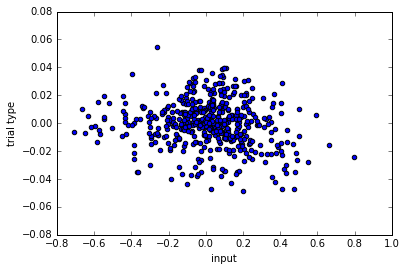

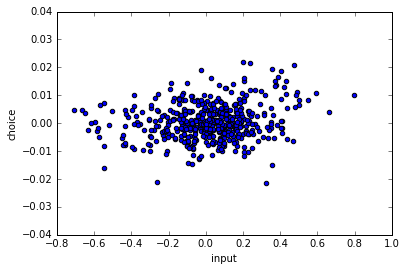

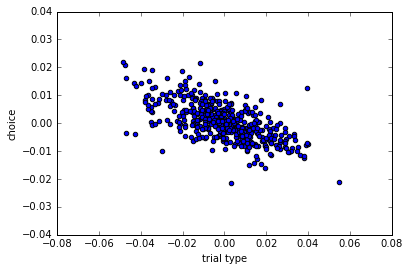

In [52]:
import matplotlib.pyplot as plt

plt.scatter(dat[:,0], dat[:,1])
plt.xlabel("input")
plt.ylabel("trial type")
plt.show()

plt.scatter(dat[:,0], dat[:,2])
plt.xlabel("input")
plt.ylabel("choice")
plt.show()

plt.scatter(dat[:,1], dat[:,2])
plt.xlabel("trial type")
plt.ylabel("choice")
plt.show()